<div style="display: flex; align-items: center;">
    <div style="text-align: center;">
        <h1><b><font color='0B5345'>Practica 6: Dise√±o de filtros digitales</font></b></h1>
                <h3><font color='0B5345'>Luisa Fernanda Enciso - Jader Stalyn Chingal Atis</font></h3>
    </div>
</div>

In [35]:
# importaci√≥n de librer√≠as
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [39]:
# FUNCIONES
def plot_filters(n, y_fpb_30, y_fpa_30, y_fpbd_30, main_title):
    """
    Plots the amplitude responses of different FIR filters.

    Parameters:
        n: array-like, time values (x-axis)
        y_fpb_30: array-like, output of the low-pass filter
        y_fpa_30: array-like, output of the  high-pass filter
        y_fpbd_30: array-like, output of the band-pass filter
        main_title: str, title for the entire figure
    """
    plt.figure(figsize=(12, 4))

    plt.subplot(131)
    plt.plot(n, y_fpb_30)
    plt.title("Filtro Pasa Bajas")
    plt.ylabel("Amplitud")
    plt.xlabel("Tiempo (s)")

    plt.subplot(132)
    plt.plot(n, y_fpa_30)
    plt.title("Filtro Pasa Altas")
    plt.ylabel("Amplitud")
    plt.xlabel("Tiempo (s)")

    plt.subplot(133)
    plt.plot(n, y_fpbd_30)
    plt.title("Filtro Pasa Banda")
    plt.ylabel("Amplitud")
    plt.xlabel("Tiempo (s)")

    # Ajustar los subplots
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

    # T√≠tulo general
    plt.suptitle(main_title, fontsize=16, y=1.05)

    plt.show()

def mfreqz(b_fpb, b_fpa, b_fpbd, a=1, order=1, nyq_rate=1, main_title="Respuesta en Frecuencia"):
    """
    Plot the impulse response of different filters in the frequency domain.

    Parameters:
        b_fpb: numerator values of the low-pass filter
        b_fpa: numerator values of the high-pass filter
        b_fpbd: numerator values of the band-pass filter
        a: denominator values of the transfer function (default is 1)
        order: order of the filter
        nyq_rate: nyquist frequency
        main_title: str, title for the overall plot
    """

    # Respuesta de frecuencia para cada filtro
    w_fpb, h_fpb = signal.freqz(b_fpb, a)
    w_fpa, h_fpa = signal.freqz(b_fpa, a)
    w_fpbd, h_fpbd = signal.freqz(b_fpbd, a)

    # Magnitudes 
    h_dB_fpb = 20 * np.log10(abs(h_fpb))
    h_dB_fpa = 20 * np.log10(abs(h_fpa))
    h_dB_fpbd = 20 * np.log10(abs(h_fpbd))

    # Fases
    h_phase_fpb = np.unwrap(np.angle(h_fpb))
    h_phase_fpa = np.unwrap(np.angle(h_fpa))
    h_phase_fpbd = np.unwrap(np.angle(h_fpbd))

    plt.figure(figsize=(12, 8))
    plt.suptitle(main_title, fontsize=16)

    # Gr√°ficas de Magnitud
    plt.subplot(3, 3, 1)
    plt.plot((w_fpb / max(w_fpb)) * nyq_rate, abs(h_fpb))
    plt.title("Pasa Bajas - Magnitud")
    plt.ylabel("Magnitud")
    plt.xlabel(r'Frecuencia Normalizada (x$\pi$ rad/muestra)')
    plt.grid(True)

    plt.subplot(3, 3, 2)
    plt.plot((w_fpa / max(w_fpa)) * nyq_rate, abs(h_fpa))
    plt.title("Pasa Altas - Magnitud")
    plt.ylabel("Magnitud")
    plt.xlabel(r'Frecuencia Normalizada (x$\pi$ rad/muestra)')
    plt.grid(True)

    plt.subplot(3, 3, 3)
    plt.plot((w_fpbd / max(w_fpbd)) * nyq_rate, abs(h_fpbd))
    plt.title("Pasa Banda - Magnitud")
    plt.ylabel("Magnitud")
    plt.xlabel(r'Frecuencia Normalizada (x$\pi$ rad/muestra)')
    plt.grid(True)

    # Gr√°ficas de Magnitud en dB
    plt.subplot(3, 3, 4)
    plt.plot((w_fpb / max(w_fpb)) * nyq_rate, h_dB_fpb)
    plt.title("Pasa Bajas - Magnitud (dB)")
    plt.ylabel("Magnitud (dB)")
    plt.xlabel(r'Frecuencia Normalizada (x$\pi$ rad/muestra)')
    plt.grid(True)

    plt.subplot(3, 3, 5)
    plt.plot((w_fpa / max(w_fpa)) * nyq_rate, h_dB_fpa)
    plt.title("Pasa Altas - Magnitud (dB)")
    plt.ylabel("Magnitud (dB)")
    plt.xlabel(r'Frecuencia Normalizada (x$\pi$ rad/muestra)')
    plt.grid(True)

    plt.subplot(3, 3, 6)
    plt.plot((w_fpbd / max(w_fpbd)) * nyq_rate, h_dB_fpbd)
    plt.title("Pasa Banda - Magnitud (dB)")
    plt.ylabel("Magnitud (dB)")
    plt.xlabel(r'Frecuencia Normalizada (x$\pi$ rad/muestra)')
    plt.grid(True)

    # Graficas de fase
    plt.subplot(3, 3, 7)
    plt.plot((w_fpb / max(w_fpb)) * nyq_rate, h_phase_fpb)
    plt.title("Pasa Bajas - Fase")
    plt.ylabel("Fase (radianes)")
    plt.xlabel(r'Frecuencia Normalizada (x$\pi$ rad/muestra)')
    plt.grid(True)

    plt.subplot(3, 3, 8)
    plt.plot((w_fpa / max(w_fpa)) * nyq_rate, h_phase_fpa)
    plt.title("Pasa Altas - Fase")
    plt.ylabel("Fase (radianes)")
    plt.xlabel(r'Frecuencia Normalizada (x$\pi$ rad/muestra)')
    plt.grid(True)

    plt.subplot(3, 3, 9)
    plt.plot((w_fpbd / max(w_fpbd)) * nyq_rate, h_phase_fpbd)
    plt.title("Pasa Banda - Fase")
    plt.ylabel("Fase (radianes)")
    plt.xlabel(r'Frecuencia Normalizada (x$\pi$ rad/muestra)')
    plt.grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar espacio para el t√≠tulo
    plt.show()

**4.1. Creaci√≥n de la se√±al**

Proponga una secuencia sinusoidal x_e (n), con 0‚â§n‚â§1000, F_0=0,01Hz y F_s=25Hz. Asuma que esta se√±al es una se√±al biol√≥gica, la cual se origina por alg√∫n proceso electrofisiol√≥gico, y que se registrar√° sobre la superficie de la piel mediante un sistema electr√≥nico. El viaje de la se√±al hipot√©tica x_e (n) a trav√©s de los diversos tejidos genera una atenuaci√≥n en la amplitud y un retraso temporal. El efecto del sistema electr√≥nico de registro sobre la se√±al de inter√©s es la adici√≥n de ruido gaussiano a la se√±al. La se√±al registrada finalmente es de la forma:

y_e(n) = Œ±x_e(n-D)+w(n)

Donde Œ± representa la amplitud, D es un retraso debido a la conducci√≥n a trav√©s de los diversos tejidos y w(n)  representa el ruido generado por la electr√≥nica de los sistemas de adquisici√≥n.

Genere las secuencias ficticias x_e (n) y y_e (n), implemente w(n)  como una secuencia de ruido Gaussiano con media cero y varianza œÉ^2=0,01, establezca Œ±=0,8 y un retraso D=15 muestras. Grafique ambas se√±ales.

In [40]:
# creaci√≥n de x_e, y_e, w_e
F0 = 0.01 # frecuencia fundamental
Fs = 25 #frecuencia de muestreo
alfa = 0.8 # atenuaci√≥n
D = 15 # retrado induciodo en la adquisici√≥n
var = 0.01 # varianza del ruido
media = 0 # media del ruido
n = np.arange(0,1001,1/Fs) # tiempo
x_e = np.sin(2*np.pi*F0*(n+D/Fs)) #potencial con con retraso
w = np.random.normal(media,np.sqrt(var),len(n)) # ruido gausiano
y_e = alfa*x_e + w # se√±al adquirida con ruido y retrado.

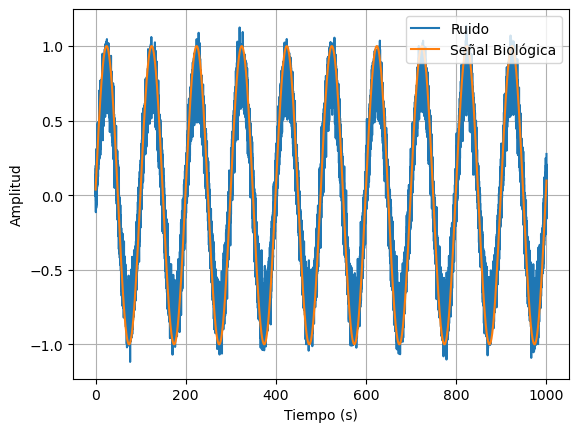

In [41]:
plt.figure()
plt.plot(n, y_e)
plt.plot(n, x_e)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend(['Ruido', 'Se√±al Biol√≥gica'])
plt.grid()
plt.show()

Text(0.5, 0, 'Tiempo (s)')

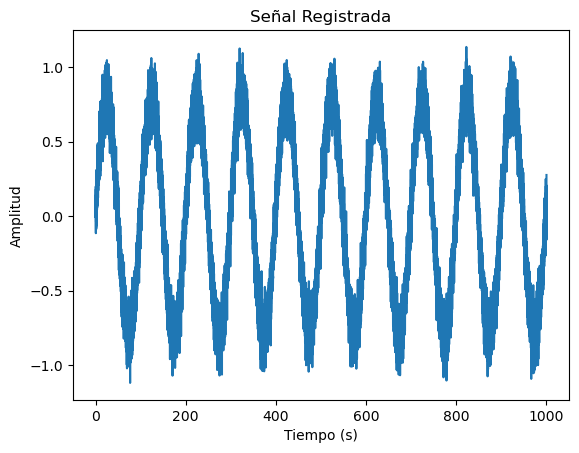

In [42]:
plt.plot(n,y_e)
plt.title('Se√±al Registrada')
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

**4.2. Dise√±o de un filtro**

La funci√≥n firwin permite dise√±ar un filtro FIR utilizando el m√©todo de ventanas, donde los principales argumentos de entrada son N: Orden del filtro y W_n: Frecuencia de corte. Para filtros digitales W_n est√° normalizado entre 0 y 1, donde 1 es la frecuencia de Nyquist que es igual a la mitad de la frecuencia de muestreo de la se√±al. W_n es igual a la frecuencia de corte del filtro dividido la frecuencia de Nyquist.



* Dise√±e un filtro FIR pasa bajas para la se√±al y_e (n), con una frecuencia de corte de 1.25 muestras/s y orden 30.

In [26]:
order = 30 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn = 1.25/nyquist #frecuencia de corte normalizada respecto nyquist
lowpass = signal.firwin(order+1,wn, pass_zero = 'lowpass',window='hamming') #filtro
y_fpb_30 = signal.filtfilt(b=lowpass,a=1,x=y_e) # aplicaci√≥n del filtro


* ¬øQu√© cambios hay en los argumentos de la funci√≥n para implementar un filtro pasa banda y pasa altas? Pruebe con una frecuencia de corte adicional de 7.5 muestras/s.

In [27]:
order = 30 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn = 7.5/nyquist #frecuencia de corte normalizada respecto nyquist
highpass = signal.firwin(order+1,wn, pass_zero = 'highpass',window='hamming') #filtro
y_fpa_30 = signal.filtfilt(b=highpass,a=1,x=y_e) # aplicaci√≥n del filtro


In [28]:
order = 30 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn_low = 7.5/nyquist #frecuencia de corte normalizada respecto nyquist
wn_high= 1.25/nyquist
bandpass = signal.firwin(order+1,[wn_high,wn_low], pass_zero = 'bandpass',window='hamming') #filtro
y_fpbd_30 = signal.filtfilt(b=bandpass,a=1,x=y_e) # aplicaci√≥n del filtro


Text(0.5, 0, 'Tiempo (s)')

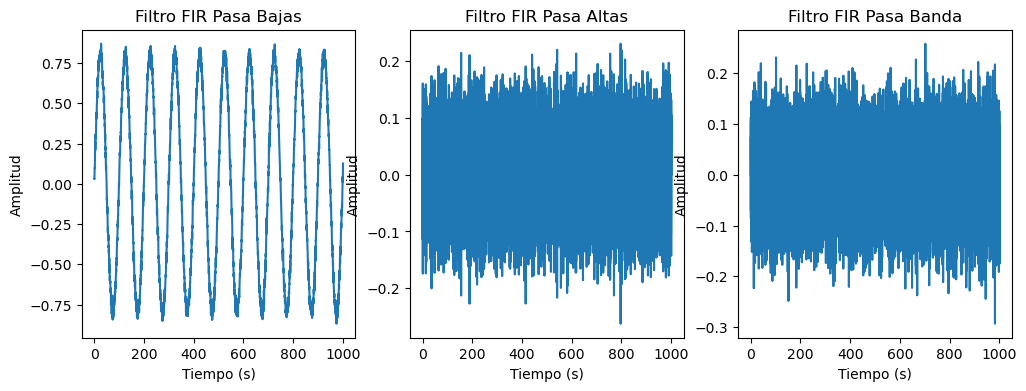

In [29]:
plt.figure(figsize=(12,4))

plt.subplot(131)
plt.plot(n,y_fpb_30)
plt.title("Filtro FIR Pasa Bajas")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.subplot(132)
plt.plot(n,y_fpa_30)
plt.title("Filtro FIR Pasa Altas")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.subplot(133)
plt.plot(n,y_fpbd_30)
plt.title("Filtro FIR Pasa Banda")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

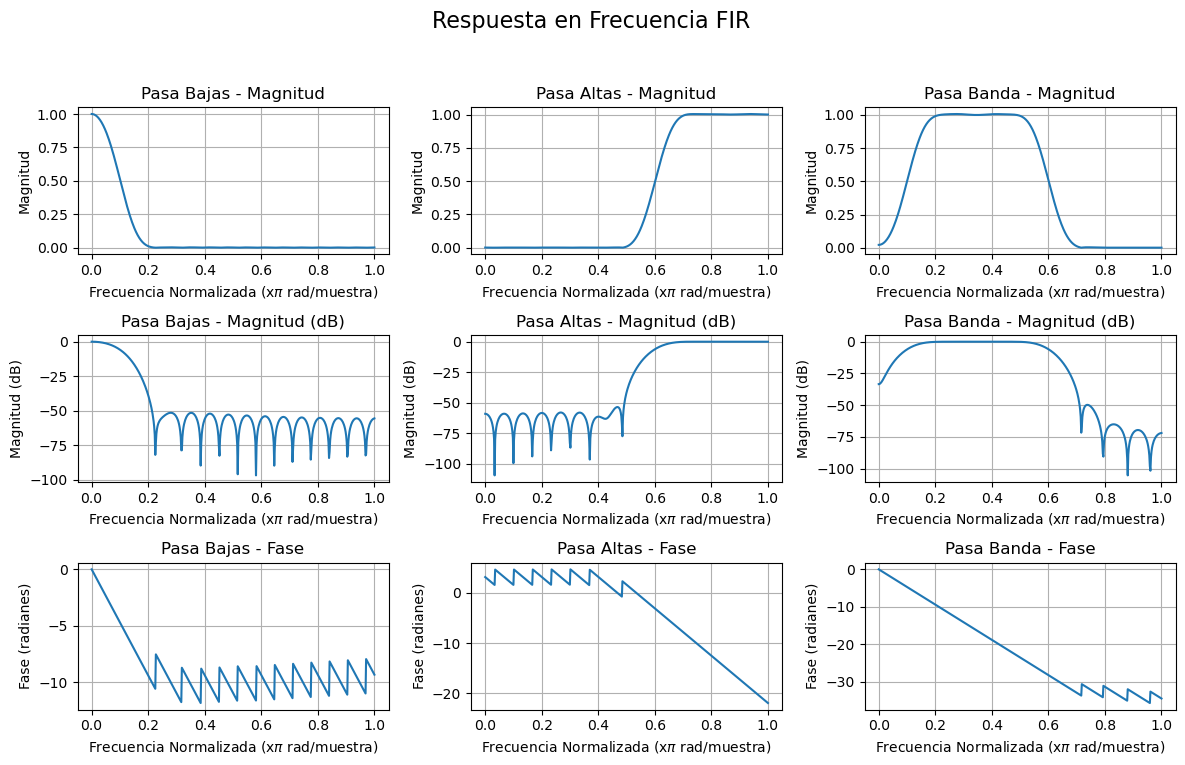

In [43]:
mfreqz(lowpass,highpass, bandpass, a=1, order=30, nyq_rate=1,main_title="Respuesta en Frecuencia FIR")

* Dise√±e un filtro IIR en las mismas condiciones de los puntos anteriores. Compare 
cambios. 

Dado que la frecuencia de corte est√° en t√©rminos de muestras por segundo, las frecuencias de corte deben ser normalizadas a la frecuencia de Nyquist, que es la mitad de la frecuencia de muestreo. En este caso, las frecuencias de corte deben dividirse por la frecuencia de Nyquist.

In [30]:
from scipy.signal import iirfilter, lfilter, freqz
# Par√°metros del filtro
order = 30            # Orden del filtro
fs = 15               # Frecuencia de muestreo en muestras/s
nyquist = fs / 2      # Frecuencia de Nyquist

# Frecuencias de corte normalizadas
low_cutoff = 1.25 / nyquist   # Para el filtro paso-bajas

* Dise√±e un filtro IIR pasa bajas para la se√±al y_e (n), con una frecuencia de corte de 1.25 muestras/s y orden 30.

In [31]:
# Filtro paso-bajas
b_low, a_low = iirfilter(order, low_cutoff, btype='low', ftype='butter')
ye_low_filtered = lfilter(b_low, a_low, y_e)  # Aplicar el filtro paso-bajas a la se√±al y_e

* ¬øQu√© cambios hay en los argumentos de la funci√≥n para implementar un filtro pasa banda y pasa altas? Pruebe con una frecuencia de corte adicional de 7.5 muestras/s.

Si tomamos para el filtro pasa-altas la frecuencia de corte como 7.5 que corresponde a la frecuencia de nyquist, no es v√°lido para un filtro digital, ya que la frecuencia de corte debe estar estrictamente menor que la frecuencia de Nyquist.
por tanto para el filtro pasa-altas tomamos ligeramente menor que 7.5

¬øQu√© cambia entre los filtros?

* Para el filtro paso-bajas, solo usamos una frecuencia de corte baja (1.25 muestras/s).
* Para el filtro paso-altas, usamos una frecuencia de corte alta (7.49 muestras/s).
* Para el filtro paso-banda, definimos un rango de frecuencias de corte, en este caso, entre 1.25 y 7.49 muestras/s.

In [32]:
# Frecuencias de corte normalizadas
high_cutoff = (7.49 / nyquist)   # Para el filtro paso-altas (ligeramente menor que 7.5)
band_cutoff = [1.25 / nyquist, (7.49 / nyquist)]  # Para el filtro paso-banda

# Filtro paso-altas
b_high, a_high = iirfilter(order, high_cutoff, btype='high', ftype='butter')
ye_high_filtered = lfilter(b_high, a_high, y_e)  # Aplicar el filtro paso-altas a la se√±al y_

# Filtro paso-banda
b_band, a_band = iirfilter(order, band_cutoff, btype='band', ftype='butter')
ye_band_filtered = lfilter(b_band, a_band, y_e)  # Aplicar el filtro paso-banda a la se√±al y_e

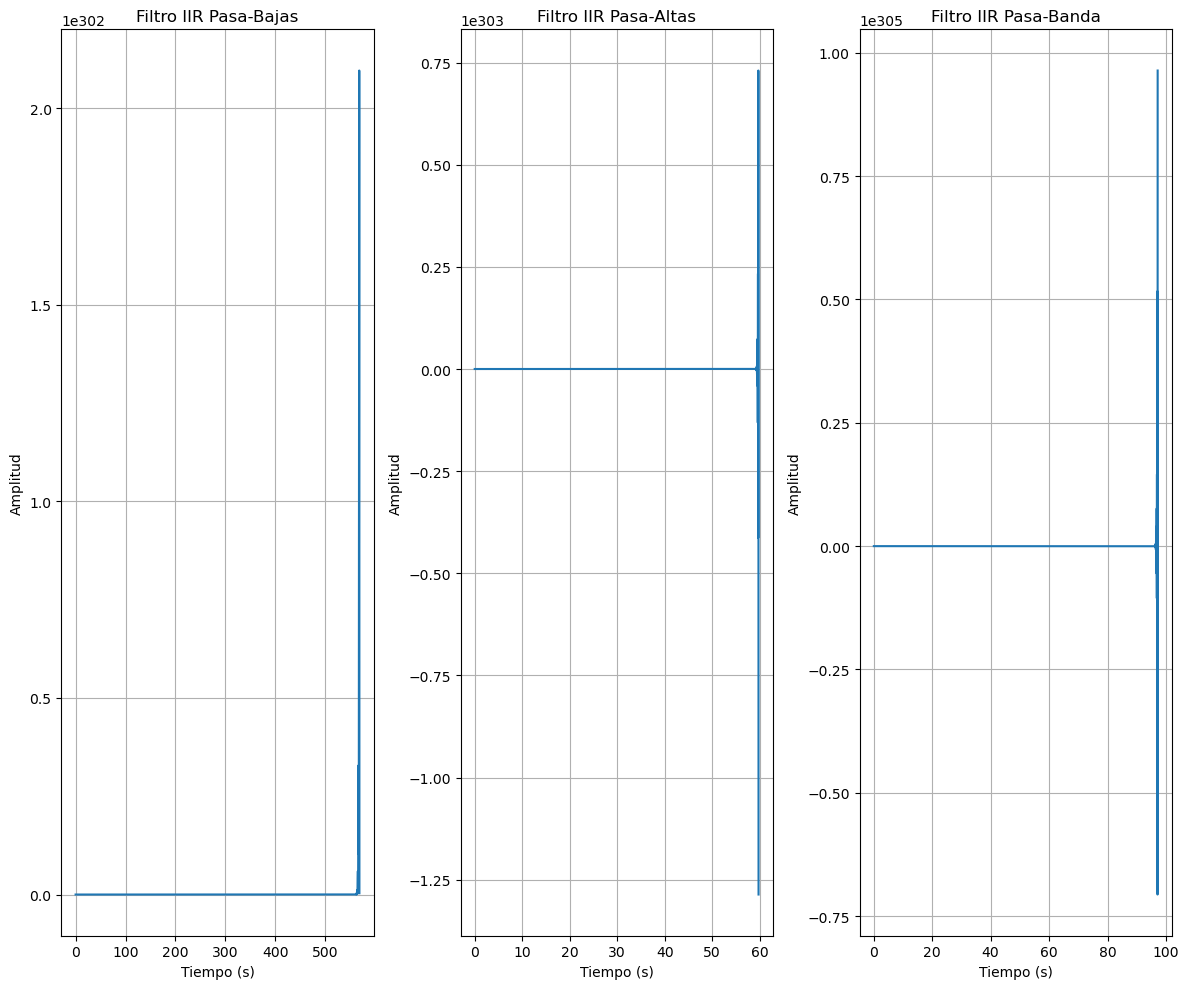

In [33]:
# Graficar se√±ales filtradas
plt.figure(figsize=(12, 10))

# Se√±al filtrada pasa-bajas
plt.subplot(1, 3, 1)
plt.plot(n, ye_low_filtered)
plt.title('Filtro IIR Pasa-Bajas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()

# Se√±al filtrada pasa-altas
plt.subplot(1, 3, 2)
plt.plot(n, ye_high_filtered)
plt.title('Filtro IIR Pasa-Altas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()

# Se√±al filtrada pasa-banda
plt.subplot(1, 3, 3)
plt.plot(n, ye_band_filtered)
plt.title('Filtro IIR Pasa-Banda')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()

plt.tight_layout()
plt.show()

**4.3. Filtrado**

Las funciones lfilter y filtfilt filtran una secuencia de informaci√≥n ùë•(ùëõ) usando un filtro IIR o FIR.
* Pruebe dichos comandos utilizando la informaci√≥n entregada por el filtro pasa bajas FIR implementado anteriormente y la se√±al ùë¶ùëí(ùëõ)

¬øPor qu√© se utiliza s√≥lo el numerador?

Cuando implementas un filtro FIR (Finite Impulse Response), solo necesitas el numerador de la funci√≥n de transferencia, ya que el filtro FIR no tiene retroalimentaci√≥n y, por lo tanto, no necesita el denominador. El numerador est√° compuesto por los coeficientes del filtro, que determinan c√≥mo se combinan las muestras de la se√±al de entrada para generar la se√±al de salida.

¬øA qu√© hace referencia el numerador?

El numerador en el contexto de un filtro FIR se refiere a la respuesta al impulso del filtro. Esencialmente, describe c√≥mo el filtro afectar√° a cada muestra de la se√±al de entrada en funci√≥n de las muestras anteriores. Los coeficientes del numerador representan la contribuci√≥n de cada muestra de entrada al resultado filtrado.

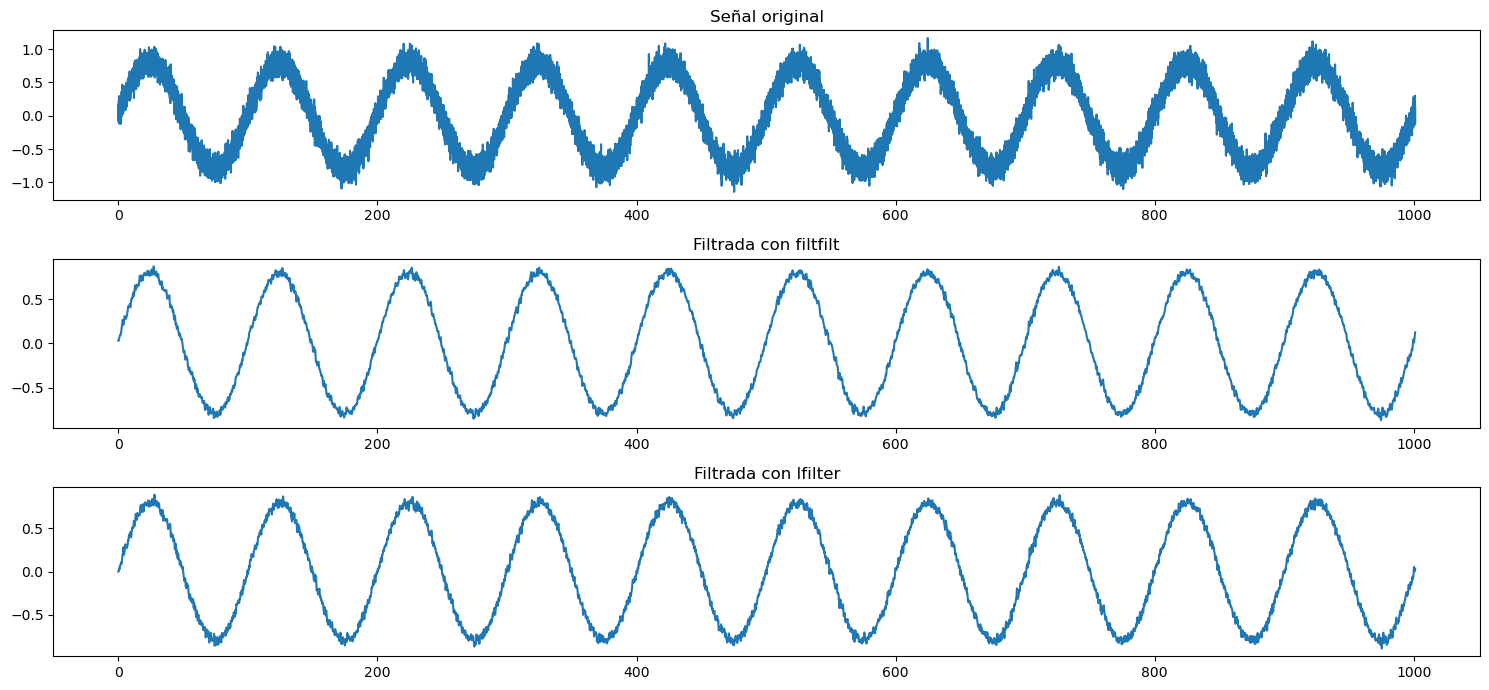

In [34]:
y_FIR=signal.filtfilt(b=lowpass,a=1,x=y_e) #aplicaci√≥n del filtro
y_FIR2=signal.lfilter(b=lowpass,a=1,x=y_e)
plt.figure(figsize=(15,7))
plt.subplot(311)
plt.plot(n,y_e)
plt.title('Se√±al original')
plt.subplot(312)
plt.plot(n,y_FIR)
plt.title('Filtrada con filtfilt')
plt.subplot(313)
plt.plot(n,y_FIR2)
plt.title('Filtrada con lfilter')
plt.tight_layout()

Evidencia de cambios en el uso de las funciones de filtrado
Al usar lfilter y filtfilt con el filtro pasa-bajas FIR aplicado a la se√±al ùë¶ùëí(ùëõ) se observan cambios notables en la salida:


* Pruebe dichos comandos utilizando la informaci√≥n entregada por el filtro pasa bajas IIR implementado anteriormente y la se√±al ùë¶ùëí(ùëõ) ¬øPor qu√© se utiliza el numerador y denominador? ¬øEs necesario cambiar el orden del filtro? En tal caso h√°galo y analice.

<hr>

**4.4. Aplicaci√≥n**

Cargue la se√±al se√±al_filtros.txt adquirida a una frecuencia de muestreo de 500 Hz. 



In [44]:
file = pd.read_csv('senal_filtros.txt', sep = '\s+', header = None)
file.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\USER\AppData\Local\Temp\ipykernel_5904\1315970969.py:1: SyntaxWarning: invalid escape sequence '\s'
  file = pd.read_csv('senal_filtros.txt', sep = '\s+', header = None)


0       1       2       3       4       5       6       7       8   \
0 -7.0306 -3.5899 -2.7995 -6.8884  0.9126 -6.7908  4.3411  6.5558  2.5295   
1 -7.0157 -3.5755 -2.7809 -6.8658  0.9288 -6.7672  4.3691  6.5822  2.5637   
2 -7.0426 -3.6058 -2.7972 -6.8852  0.9068 -6.7855  4.3449  6.5713  2.5465   
3 -7.0599 -3.6356 -2.8107 -6.8951  0.8900 -6.8084  4.3239  6.5683  2.5225   
4 -7.0538 -3.6399 -2.7953 -6.8751  0.9060 -6.7994  4.3398  6.5981  2.5667   

       9       10      11      12      13      14      15  
0 -3.5293 -0.1973 -0.8435  0.7202  1.1319  1.3364 -7.3164  
1 -3.5019 -0.1715 -0.8095  0.7518  1.1564  1.3747 -7.2797  
2 -3.5271 -0.1917 -0.8273  0.7263  1.1290  1.3568 -7.2978  
3 -3.5532 -0.2127 -0.8512  0.6976  1.0976  1.3305 -7.3204  
4 -3.5144 -0.1691 -0.8081  0.7417  1.1319  1.3765 -7.2710

Extraiga y trabaje con el canal 1 de la se√±al.

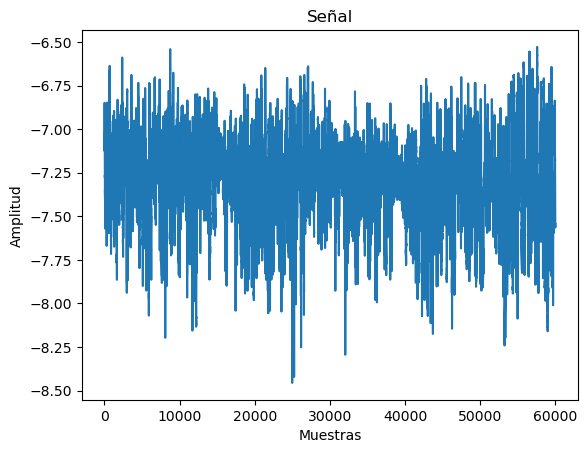

In [45]:
canal1 = file[0]
fs = 500
Ts = 1/fs

plt.figure()
plt.plot(canal1)
plt.title('Se√±al')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

* Realice un an√°lisis frecuencial con la funci√≥n que permite calcular el
periodograma de Welch de una se√±al ¬øHay presencia de ruido el√©ctrico? Analice. 

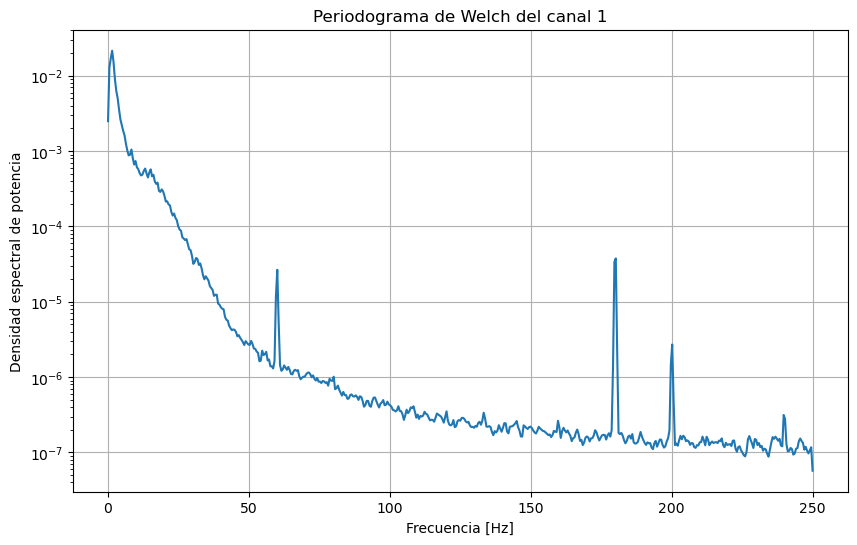

In [46]:
from scipy.signal import welch, firwin, filtfilt
nperseg = 1024 # Ancho de la ventana, nperseg no debe ser mayor que la longitud de la se√±al
noverlap = int(nperseg / 2)  # Solapamiento de las ventanas del 50%
ventana = np.hanning(nperseg)  # Ventana Hanning
# Calcular el periodograma de Welch
f, power = welch(canal1, fs, window=ventana, nperseg=nperseg, noverlap=noverlap)

# Graficar el periodograma
plt.figure(figsize=(10, 6))
plt.semilogy(f, power)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch del canal 1')
plt.grid(True)
plt.show()

¬øHay presencia de ruido electrico?

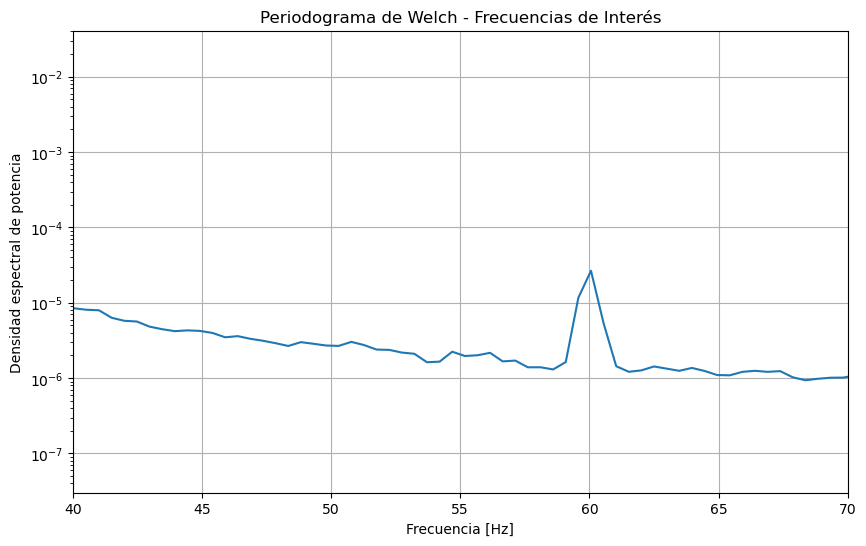

In [47]:
# Graficar el periodograma
plt.figure(figsize=(10, 6))
plt.semilogy(f, power)
plt.xlim(40,70)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch - Frecuencias de Inter√©s')
plt.grid(True)
plt.show()

* Dise√±e un filtro FIR que permita eliminar el ruido de la se√±al. Grafique. Luego
verifique nuevamente el comportamiento en frecuencia (periodograma de Welch de la se√±al filtrada) ¬øHay cambios? Analice.

* Grafique un segmento de las se√±ales antes y despu√©s de filtrar, analice los
cambios